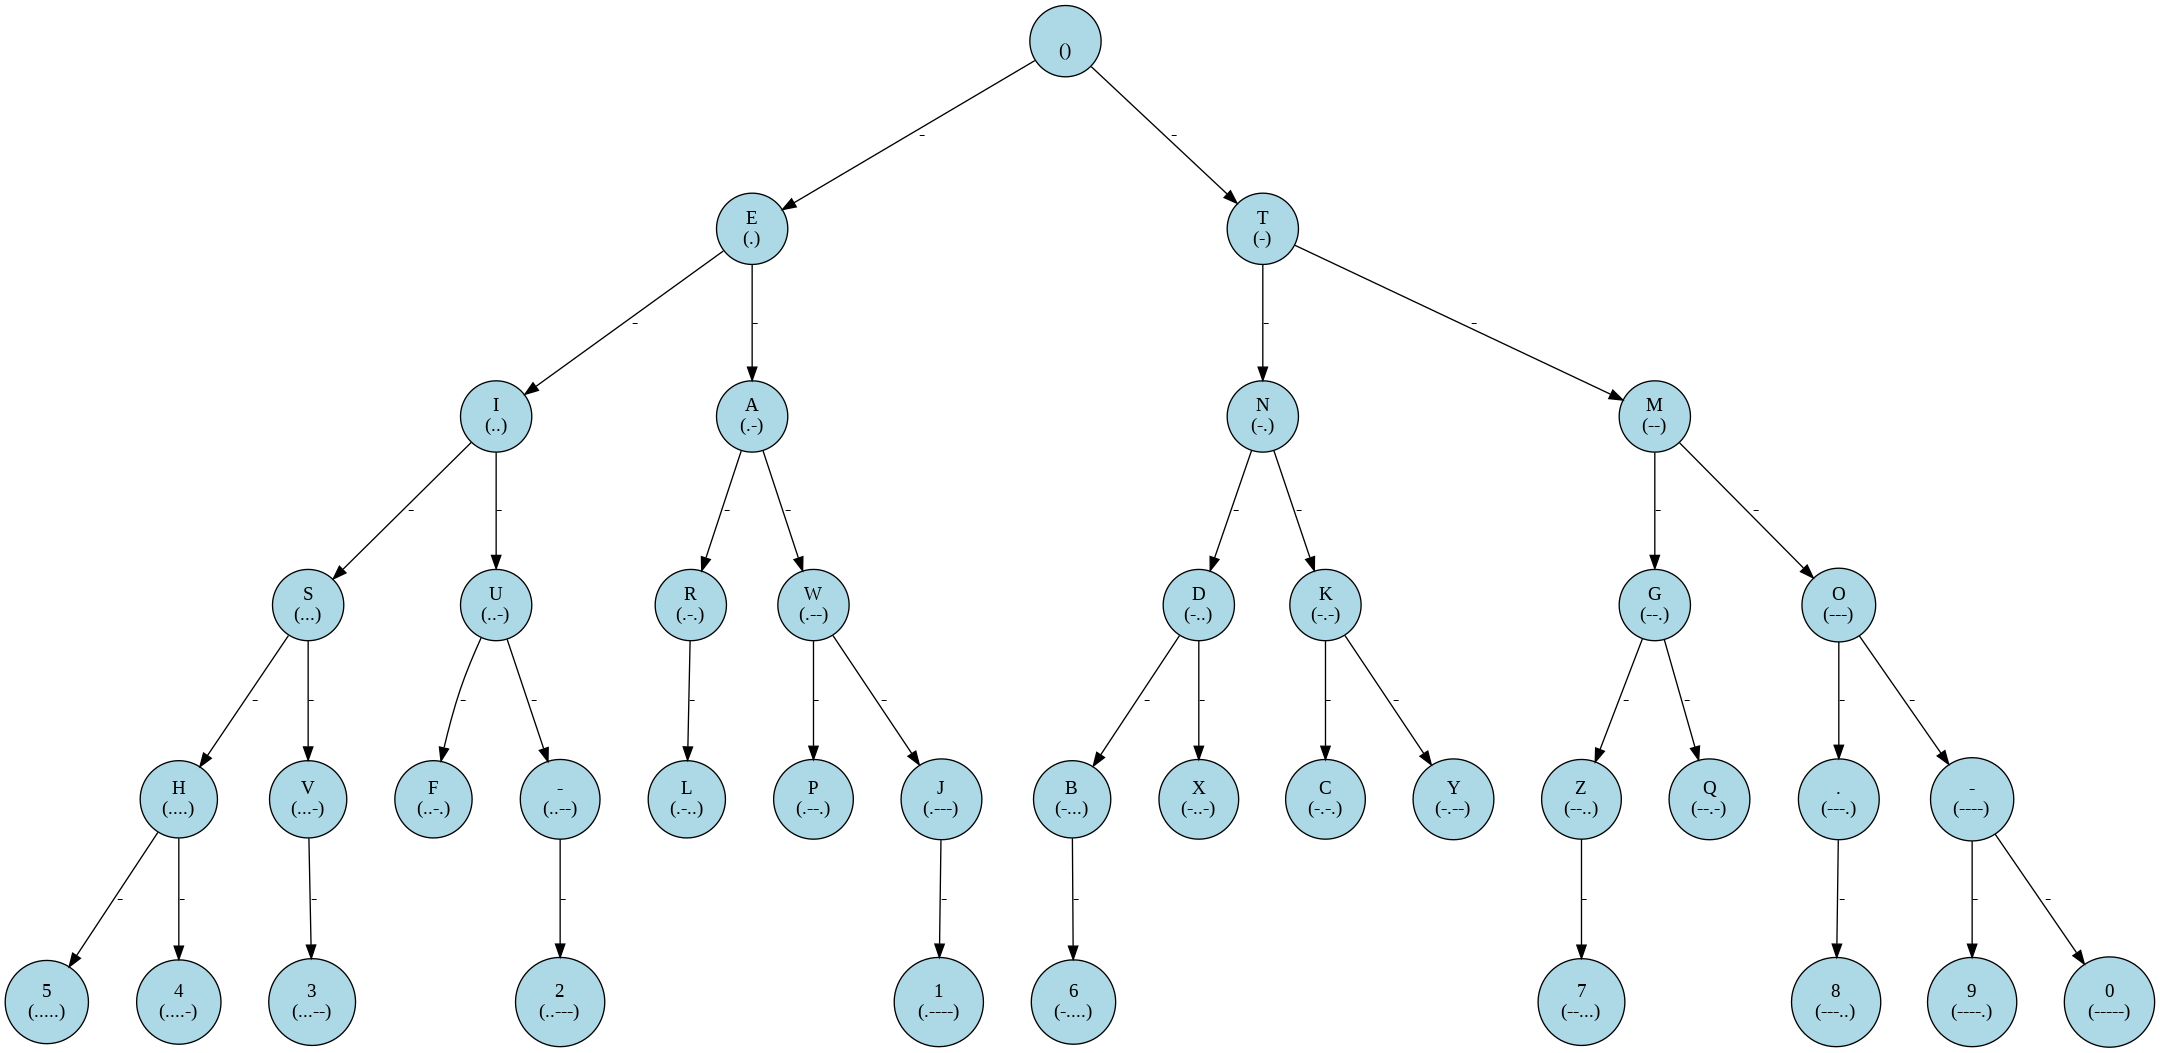

In [1]:
from graphviz import Digraph
from IPython.display import Image, display

class MorseTreeNode:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

def build_morse_tree():
    morse_code_data = {
        'A': '.-', 'B': '-...', 'C': '-.-.', 'D': '-..', 'E': '.',
        'F': '..-.', 'G': '--.', 'H': '....', 'I': '..', 'J': '.---',
        'K': '-.-', 'L': '.-..', 'M': '--', 'N': '-.', 'O': '---',
        'P': '.--.', 'Q': '--.-', 'R': '.-.', 'S': '...', 'T': '-',
        'U': '..-', 'V': '...-', 'W': '.--', 'X': '-..-', 'Y': '-.--',
        'Z': '--..', '1': '.----', '2': '..---', '3': '...--',
        '4': '....-', '5': '.....', '6': '-....', '7': '--...',
        '8': '---..', '9': '----.', '0': '-----', ' ': ' '
    }

    root = MorseTreeNode('START')
    for char, morse_code in morse_code_data.items():
        node = root
        for dot_dash in morse_code:
            if dot_dash == '.':
                if not node.left:
                    node.left = MorseTreeNode('.')
                node = node.left
            elif dot_dash == '-':
                if not node.right:
                    node.right = MorseTreeNode('-')
                node = node.right
        node.data = char

    return root

def visualize_morse_tree(node, graph, parent=None, code=""):
    if node:
        current_node_label = f"{node.data}\n({code})"
        graph.node(current_node_label, shape='circle', style='filled', fillcolor='lightblue')

        if parent:
            label = '.' if parent.endswith('.') else '-'
            graph.edge(parent, current_node_label, label=label)

        visualize_morse_tree(node.left, graph, current_node_label, code + ".")
        visualize_morse_tree(node.right, graph, current_node_label, code + "-")


def main():
    morse_tree = build_morse_tree()
    dot = Digraph(comment='Morse Code Tree', format='png')
    dot.attr(ranksep='1', nodesep='0.5')  # Menambahkan jarak antar level (ranksep=1) dan jarak horizontal antara node pada level yang sama (nodesep=0.5)
    visualize_morse_tree(morse_tree, dot)
    dot.render('morse_code_tree', view=False)

    image_path = 'morse_code_tree.png'
    display_image = Image(image_path)
    display(display_image)

if __name__ == "__main__":
    main()


In [2]:
def morse_code_generator(root, text):
    morse_dict = {}
    generate_morse_code(root, '', morse_dict)
    encoded_text = ""
    for char in text:
        if char.upper() in morse_dict:
            encoded_text += morse_dict[char.upper()] + " "
        elif char == " ":
            encoded_text += "// "
        else:
            encoded_text += char
    return encoded_text

def generate_morse_code(node, code, morse_dict):
    if node:
        if node.data:
            morse_dict[node.data] = code
        generate_morse_code(node.left, code + '.', morse_dict)
        generate_morse_code(node.right, code + '-', morse_dict)
    else:  # Add this block to handle spaces in the tree
        morse_dict[" "] = "//"  # Store "//" in the dictionary for space

def main():
    morse_tree = build_morse_tree()
    text = input("input: ")
    encoded_text = morse_code_generator(morse_tree, text)

    print(f"Original text: {text}")
    print(f"Encoded text: {encoded_text}")

if __name__ == "__main__":
    main()


input: morse code for developer
Original text: morse code for developer
Encoded text: -- --- .-. ... . // -.-. --- -.. . // ..-. --- .-. // -.. . ...- . .-.. --- .--. . .-. 
